## Course Project: Supervised Machine Learning Regression

### Objective:

The objective of this report is to deepen in the interpretation of the data collected corresponding to housing sales in Ames Iowa USA. From the results obtained, we will be able to analyze the influence of the different features to determine the sailing price. It is relevant to determine the influences of the study variables. With this information, we will be able to maximize the benefit of future investments in real estate projects in the area.

### Description of the Data Set and its attributes

The study data set is the one provided in the course. Among the main attributes of the data can be found those described below.

### Predictor

* SalePrice: The property's sale price in dollars. 

### Features

* MoSold: Month Sold
* YrSold: Year Sold   
* SaleType: Type of sale
* SaleCondition: Condition of sale
* MSSubClass: The building class
* MSZoning: The general zoning classification

## Exploratory Data Analisis
### Initial plan for data exploration and actions for data cleaning and feature engineering.

Since we start from the base of the EDA Project data set, it is already correct concerning Data Cleaning, the data set does not have null values. However, we will do the corresponding variables transformations to carry out the different linear regressions of the adequate tide. Then we will preliminarily analyze the existing correlations between the features, to generate a better understanding of linear regression.

#### Data Cleaning and Feature Engineering

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy import stats
from IPython.display import display

Analyzing the data set

In [172]:
filepath = 'Ames_Housing_Sales.csv'
data = pd.read_csv(filepath)
display(data.head())
print(data.info())

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   float64
 1   2ndFlrSF       1379 non-null   float64
 2   3SsnPorch      1379 non-null   float64
 3   Alley          1379 non-null   object 
 4   BedroomAbvGr   1379 non-null   int64  
 5   BldgType       1379 non-null   object 
 6   BsmtCond       1379 non-null   object 
 7   BsmtExposure   1379 non-null   object 
 8   BsmtFinSF1     1379 non-null   float64
 9   BsmtFinSF2     1379 non-null   float64
 10  BsmtFinType1   1379 non-null   object 
 11  BsmtFinType2   1379 non-null   object 
 12  BsmtFullBath   1379 non-null   int64  
 13  BsmtHalfBath   1379 non-null   int64  
 14  BsmtQual       1379 non-null   object 
 15  BsmtUnfSF      1379 non-null   float64
 16  CentralAir     1379 non-null   object 
 17  Condition1     1379 non-null   object 
 18  Conditio

There is no missing data, since this data set have been previously modified

In [173]:
data.dtypes.value_counts()

object     43
float64    21
int64      16
dtype: int64


We get the columns with the data type corresponding to objects, useful later for One-Hot Encoding.

In [174]:
object_columns = data.columns[data.dtypes == object]
object_columns.values

array(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1',
       'Condition2', 'Electrical', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation',
       'Functional', 'GarageCond', 'GarageFinish', 'GarageQual',
       'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual',
       'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning',
       'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive',
       'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType',
       'Street', 'Utilities'], dtype=object)

Analyzing the target value: Sale Price

C:\Users\enzof\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NormaltestResult(statistic=594.3267259061613, pvalue=8.781955774010152e-130) 
 Skew:  1.935362098363132 
 Kurt:  6.735649337267559


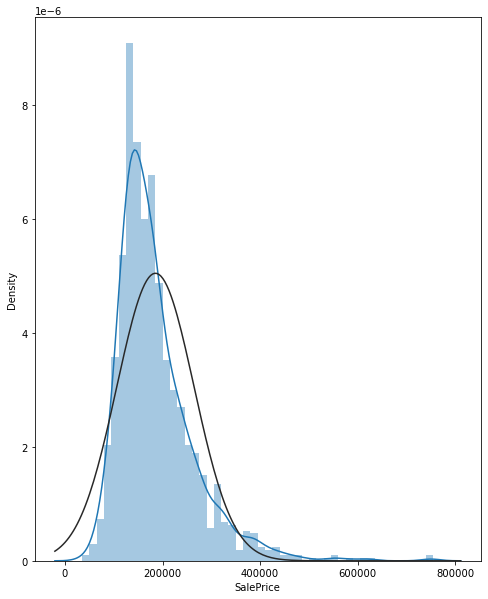

In [175]:
sns.distplot(data['SalePrice'], fit=stats.norm);
print(stats.normaltest(data.SalePrice),'\n', 'Skew: ', data.SalePrice.skew(), '\n', 'Kurt: ', data.SalePrice.kurt())

Normalizing the Sale Price. 

Lambda:  -0.2038831773965207
NormaltestResult(statistic=20.60421626101897, pvalue=3.356226691547964e-05) 
 Skew:  -0.018305129116178546 
 Kurt:  0.8031335636865577


C:\Users\enzof\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


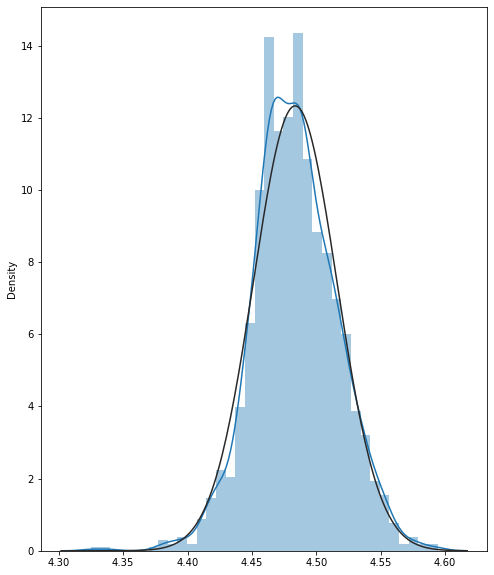

In [176]:
#Box-Cox
bc_SalePrice = stats.boxcox(data.SalePrice)
boxcox_SalePrice = bc_SalePrice[0] 
lam = bc_SalePrice[1] 
print('Lambda: ', lam)

sns.distplot(boxcox_SalePrice, fit=stats.norm);

df_bc_SalePrice = pd.DataFrame(bc_SalePrice[0])[0]
print(stats.normaltest(bc_SalePrice[0]), '\n', 'Skew: ', df_bc_SalePrice.skew(), '\n', 'Kurt: ', df_bc_SalePrice.kurt())
# skew_limit = 0.75


C:\Users\enzof\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NormaltestResult(statistic=34.99556530598817, pvalue=2.5165730895928392e-08) 
 Skew:  0.2901665026629582 
 Kurt:  0.6856843282078717


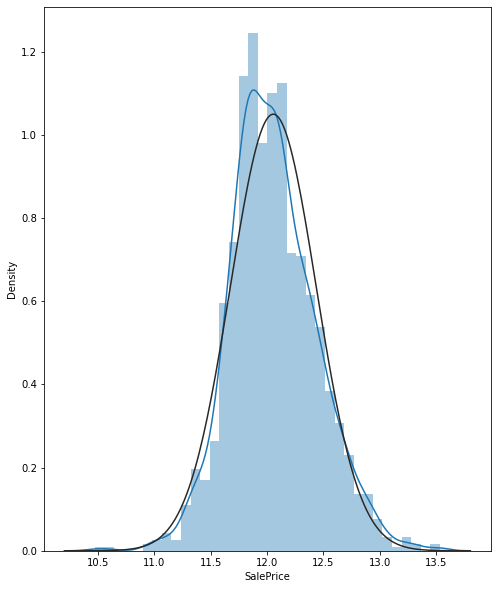

In [177]:
#log1p
log_SalePrice = data.SalePrice.apply(np.log1p)
sns.distplot(log_SalePrice, fit=stats.norm);
print(stats.normaltest(log_SalePrice), '\n', 'Skew: ', log_SalePrice.skew(), '\n', 'Kurt: ', log_SalePrice.kurt())
# skew_limit = 0.75

We are going to analyze the correlations between variables in order to determine multicollinearity.

<AxesSubplot:>

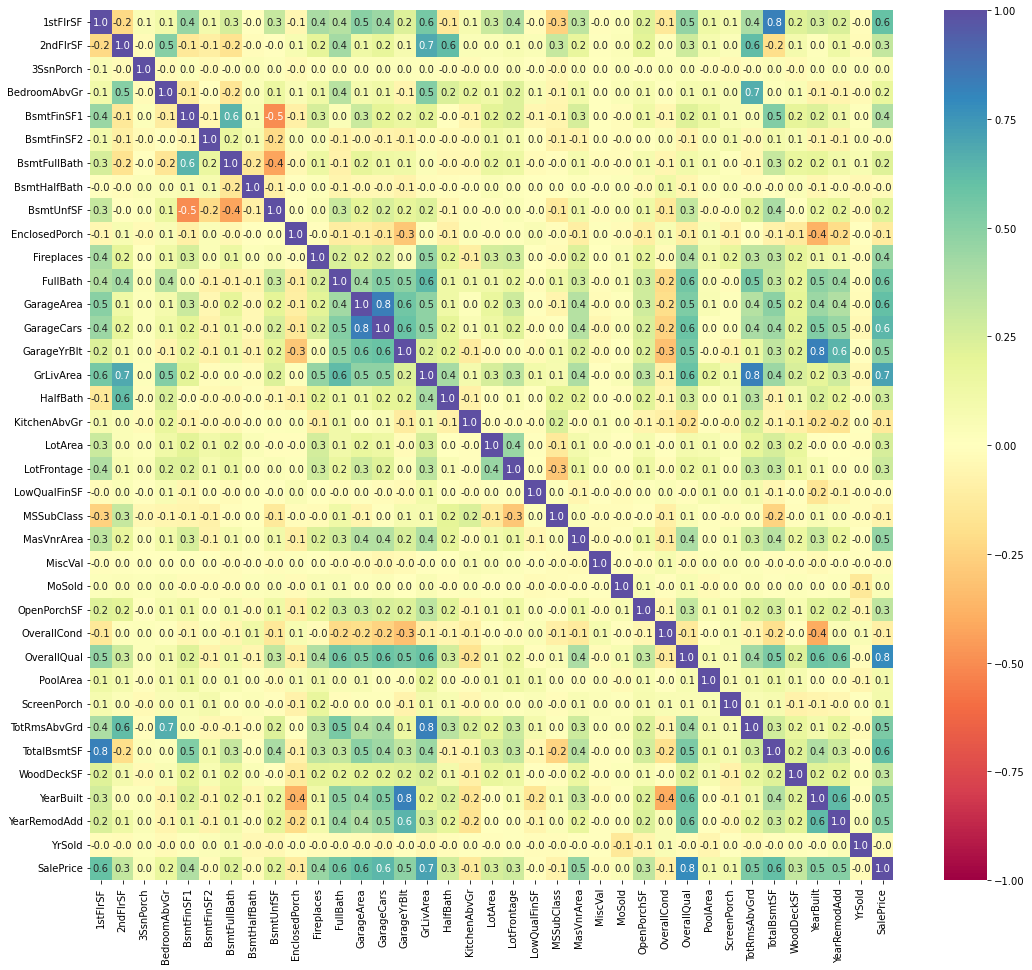

In [178]:
correlation = data.corr()
f, ax = plt.subplots(figsize=(18, 16))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".1f", cmap="Spectral")

In [179]:
correlation.sort_values(["SalePrice"], ascending = False, inplace = True)
print(correlation.SalePrice.apply(abs))

SalePrice        1.000000
OverallQual      0.787228
GrLivArea        0.708172
GarageCars       0.637095
GarageArea       0.608405
TotalBsmtSF      0.603583
1stFlrSF         0.594935
FullBath         0.556550
TotRmsAbvGrd     0.538309
YearBuilt        0.507584
YearRemodAdd     0.505434
GarageYrBlt      0.486362
MasVnrArea       0.463139
Fireplaces       0.448877
BsmtFinSF1       0.375563
OpenPorchSF      0.333036
2ndFlrSF         0.313336
WoodDeckSF       0.312631
LotFrontage      0.281976
HalfBath         0.270721
LotArea          0.252921
BsmtFullBath     0.225988
BsmtUnfSF        0.213135
BedroomAbvGr     0.164655
ScreenPorch      0.099453
PoolArea         0.091518
MoSold           0.043749
3SsnPorch        0.039226
LowQualFinSF     0.008364
MiscVal          0.017933
BsmtFinSF2       0.023243
BsmtHalfBath     0.025651
YrSold           0.026726
MSSubClass       0.077707
OverallCond      0.095278
EnclosedPorch    0.120164
KitchenAbvGr     0.135574
Name: SalePrice, dtype: float64


We are going to analyze in more depth the features with high correlation with the terget value.


<AxesSubplot:>

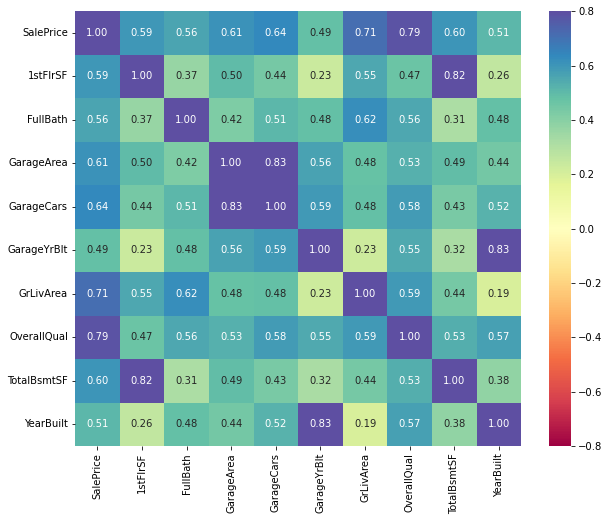

In [180]:
columns = ['SalePrice','1stFlrSF','FullBath','GarageArea','GarageCars','GarageYrBlt','GrLivArea','OverallQual','TotalBsmtSF','YearBuilt']
correlation = data[columns].corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation, annot=True, vmin=-0.8, vmax=0.8, fmt=".2f", cmap="Spectral")

As we can see the variables '1stFlrSF'/'TotalBsmtSF' and 'GarageArea'/'GarageCars'/'GarageYrBlt' are highly correlated. Since the correlation is so strong this can be an indication of multicollinearity. We are then going to eliminate the variables from the data set and study the rest of the variables with high correlation with the target value.

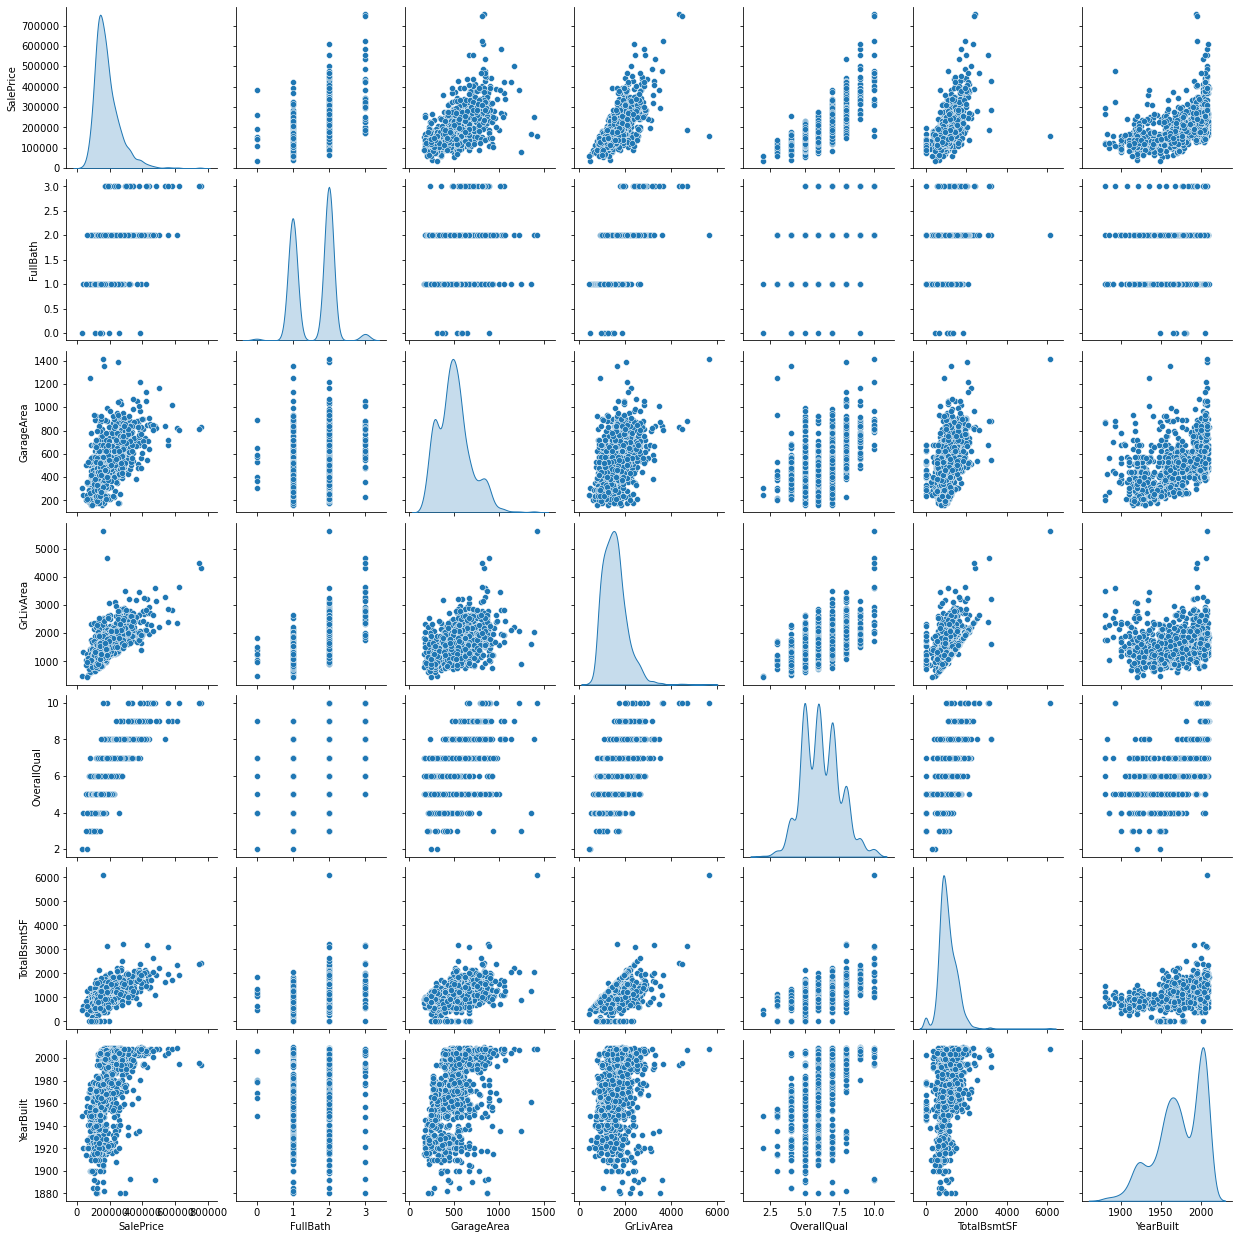

In [181]:
original_data= data.copy()
data = data.drop(['1stFlrSF','GarageCars','GarageYrBlt'], axis=1)
columns = ['SalePrice','FullBath','GarageArea','GrLivArea','OverallQual','TotalBsmtSF','YearBuilt']
sns.pairplot(data[columns], diag_kind="kde")  

### Encoding features

In [182]:
from sklearn.preprocessing import OneHotEncoder

data_ohc = data.copy()
ohc = OneHotEncoder()

for column in object_columns:
    Sparse_Matrix = ohc.fit_transform(data_ohc[[column]]) # When working with sklearn tranformers and predictors we need to ensure that we are working with TWO DIMENSIONS. Return a Sparse Matrix.
    data_ohc = data_ohc.drop(column, axis=1) # Drop original column from the dataframe
    unique_values = ohc.categories_ # Get names of all unique values in columns
    new_columns = ['_'.join([column, categorie]) for categorie in unique_values[0]] # Create column names for each one column by value
    new_df = pd.DataFrame(Sparse_Matrix.toarray(), columns=new_columns) # Create the new dataframe from the Sparse Matrix    
    data_ohc = pd.concat([data_ohc, new_df], axis=1) # Append the new data to the dataframe, axis=1: to the right.
data_ohc.head()


,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [183]:
data_ohc = pd.get_dummies(data, columns = object_columns, drop_first=True) 
data_ohc.head()

,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,0,...,0,0,0,0,0,0,0,1,1,0
1,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,1,...,0,0,0,0,0,0,0,1,1,0
2,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,1,...,0,0,0,0,0,0,0,1,1,0
3,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,1,...,0,0,0,0,0,0,0,1,1,0
4,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,1,...,0,0,0,0,0,0,0,1,1,0


### Linear Regression Models
Now we are going to develop the following linear regression models.

- sklearn.linear_model.LinearRegression
- sklearn.linear_model.LinearRegression & sklearn.preprocessing.PolynomialFeatures
- sklearn.linear_model.Lasso & sklearn.linear_model.ElasticNet

#### Linear Regression

Here we develop a simple linear regression

In [184]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

Since for all three cases we will use the same cross-validation method:

In [185]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3) # Same cross-validation method for all the cases. 

Let's first perform the linear regression for the data set with the modified categorical features (one-hot-encoded).

In [186]:
estimator = Pipeline([("scaler", StandardScaler()),
                      ("regression", LinearRegression())])
# column = [col for col in data_ohc.columns if col != 'SalePrice']
features = data_ohc.drop('SalePrice', axis=1)
target = data_ohc.SalePrice

estimator.fit(features, target)
predictions = cross_val_predict(estimator, features, target, cv=kf)
r2_score(predictions, target)

lr = estimator.named_steps["regression"].coef_

R^2 is very small, this may be due to the presence of outliers in the predictions.By removing the outliers and plotting the correlation, result in a clear linear correlation between the predictions and the target value.

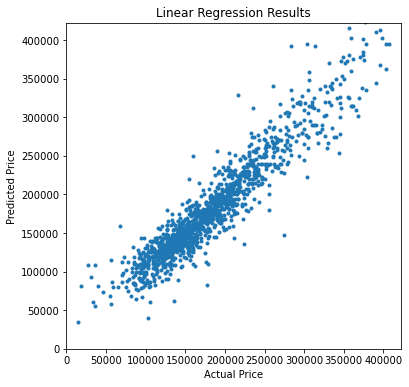

In [187]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(predictions, target, 
         marker='o', ls='', ms=3.0)
  
lim = (0, target.mean() + 3*target.std())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

Now let's see the correlation for a model with no categorical values and a log transformation of the target value. 

In [188]:
estimator = Pipeline([("scaler", StandardScaler()),
                      ("linear_regression", LinearRegression())])

object_columns = data.columns[data.dtypes == object]
new_data = data.drop(object_columns, axis=1)

features = new_data.drop('SalePrice', axis=1)
target = log_SalePrice
predictions = cross_val_predict(estimator, features, target, cv=kf)

r2_score(predictions, target)
#r2_score(np.exp(predictions) - 1, np.exp(target) - 1) 

0.8115758219323024

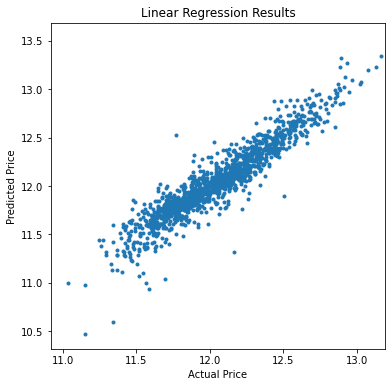

In [189]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(predictions, target, 
         marker='o', ls='', ms=3.0)

lim = (target.mean() - 3*target.std(), target.mean() + 3*target.std())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       title='Linear Regression Results');

Result of a stronger correlation between the predictions and de target value.  

#### Linear Regression & Polynomial Features
Let's do the same but adding polynomial features to the mix. 

In [190]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

Linear regression with polynomial features for the data set with the modified categorical features (one-hot-encoded).

In [191]:
estimator = Pipeline([
        ("polynomial_features", PolynomialFeatures()),
        ("scaler", StandardScaler()),
        ("linear_regression", LinearRegression())])
        
params = {
    'polynomial_features__degree': [1, 2]
}

grid = GridSearchCV(estimator, params, cv=kf)

features = data_ohc.drop('SalePrice', axis=1)
target = data_ohc.SalePrice

estimator.fit(features, target)
grid.fit(features, target)
print(grid.best_score_, grid.best_params_)
 
y_predict = grid.predict(features)
print(r2_score(y_predict, target))
lr_poly = estimator.named_steps["linear_regression"].coef_


0.7498354260598211 {'polynomial_features__degree': 2}
1.0


Since the R^2 = 1, it is an indication of overfitting. Therefore, extrapolating our model to another data set will have high dispersion. We will try to correct this by applying a regularization regression.

In [192]:
df_importances = pd.DataFrame(zip(estimator.named_steps["polynomial_features"].get_feature_names(),
                 estimator.named_steps["linear_regression"].coef_,
))
df_importances.round(0).sort_values(by=1)

,0,1
5247,x21^2,-12283.0
5263,x21 x37,-3228.0
1126,x3 x139,-3096.0
5413,x21 x187,-2899.0
7193,x29 x187,-2848.0
...,...,...
32,x31,5466.0
7473,x31 x32,5551.0
7472,x31^2,5582.0
5253,x21 x27,7712.0


When we work with a model with no categorical values and a log transformation of the target value, we get a higher average of R^2 scores and more reliable results.

In [193]:
estimator = Pipeline([
        ("polynomial_features", PolynomialFeatures()),
        ("scaler", StandardScaler()),
        ("linear_regression", LinearRegression())])
        
params = {
    'polynomial_features__degree': [1, 2]
}

grid = GridSearchCV(estimator, params, cv=kf)

features = new_data.drop('SalePrice', axis=1)
target = log_SalePrice

estimator.fit(features, target)
grid.fit(features, target)
print(grid.best_score_, grid.best_params_)
 
y_predict = grid.predict(features)
print(r2_score(y_predict, target))
# r2_score(np.exp(predictions) - 1, np.exp(target) - 1) 

0.8342688944832054 {'polynomial_features__degree': 1}
0.8361798502015325


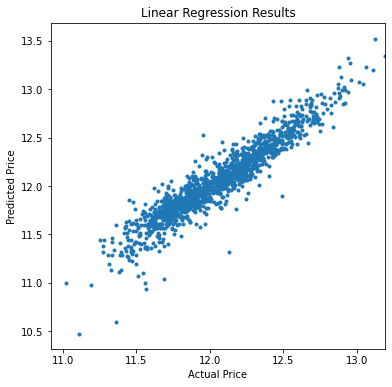

In [194]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_predict, target, 
         marker='o', ls='', ms=3.0)
lim = (target.mean() - 3*target.std(), target.mean() + 3*target.std())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       title='Linear Regression Results');

#### Regularization Regression

Finally, since we will focus on the interpretability of the data set, we will use the Lasso regularization regression model. It will decrease the coefficients of the variables of minor importance to 0.


In [195]:
from sklearn.linear_model import Lasso

estimator = Pipeline([
        ("polynomial_features", PolynomialFeatures()),
        ("scaler", StandardScaler()),
        ("lasso_regression", Lasso(max_iter=5e4))])
        
params = {
    'polynomial_features__degree': [2],
    'lasso_regression__alpha': np.array([934,935,936]) # Iteration 1: np.array([0.005, 0.05, 0.1, 1, 5, 20, 50, 80, 100, 120, 140]) --> 140
}                                                      # Iteration 2: np.array([140,200,500]) --> 500
                                                       # Iteration 3: np.array([500,1000,2000]) --> 1000
                                                       # Iteration 4: np.array([900,950,1000]) --> 950
                                                       # Iteration 5: np.array([920,930,940]) --> 930
                                                       # Iteration 6: np.array([934,935,936]) --> 935
grid = GridSearchCV(estimator, params, cv=kf)

features = new_data.drop('SalePrice', axis=1)
target = new_data.SalePrice

estimator.fit(features, target)
grid.fit(features, target)
print(grid.best_score_, grid.best_params_)
 
y_predict = grid.predict(features)
print(r2_score(y_predict, target))
lasso_ = estimator.named_steps["lasso_regression"].coef_

C:\Users\enzof\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79139121106.77234, tolerance: 860530034.3448577
  model = cd_fast.enet_coordinate_descent(


0.7789888340713257 {'lasso_regression__alpha': 935, 'polynomial_features__degree': 2}
0.8649551854986306


In [196]:
df_importances = pd.DataFrame(zip(estimator.named_steps["polynomial_features"].get_feature_names(),
                 estimator.named_steps["lasso_regression"].coef_,
))
df_importances.round(0).sort_values(by=1)

,0,1
539,x22 x32,-144320.0
341,x10 x32,-142325.0
363,x11 x32,-138459.0
577,x27 x30,-129925.0
364,x12^2,-127653.0
...,...,...
572,x26 x31,116655.0
456,x16 x30,128747.0
362,x11 x31,137363.0
339,x10 x30,157674.0


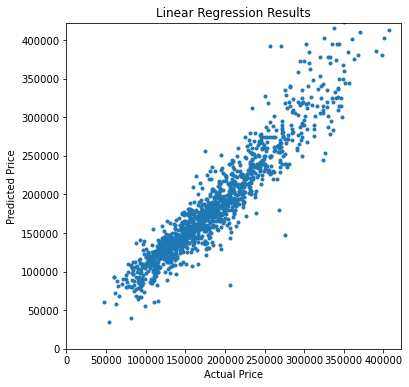

In [197]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_predict, target, 
         marker='o', ls='', ms=3.0)
lim = (0, target.mean() + 3*target.std())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

### Summary
In summary, the following can be highlighted. 

All the regressions were favored when log transforming the target value. Standardizing the variables is advantageous in all terms. Broadly speaking, an increase in r^2 is appreciable as new models are proposed.

Results: 

- Linear Regression: $r^2 = 0.81$
- Linear Regression with Polynomial effects: $r^2 = 0.84$
- Lasso (with alpha optimization): $r^2 = 0.87$

In conclusion, good linear relationships were obtained in all cases. The best model for this particular case is the Regression Regularization Lasso   model with the corresponding alpha optimization. It offers a greater reduction of features, which favors the interpretability of the data set, and has the larger r^2. 

In [201]:
len(lasso_)

595

In [213]:
lrdf = pd.DataFrame()
lrdf['Linear Regression'] = lr
display(lrdf.round(0).describe())

lrpfdf = pd.DataFrame()
lrpfdf['Linear Regression & Polynomial Features'] = lr_poly
display(lrpfdf.round(0).describe())

lassodf = pd.DataFrame()
lassodf['Lasso Regression'] = lasso_
display(lassodf.round(0).describe())

,Linear Regression
count,2.480000e+02
mean,1.612326e+14
std,4.234589e+15
min,-2.763824e+16
25%,-1.376000e+03
50%,3.565000e+02
75%,2.839750e+03
max,2.911521e+16


,Linear Regression & Polynomial Features
count,31125.00000
mean,2.86053
std,231.75228
min,-12283.00000
25%,-15.00000
50%,0.00000
75%,15.00000
max,16082.00000


,Lasso Regression
count,595.000000
mean,175.968067
std,28759.417910
min,-144320.000000
25%,-3905.000000
50%,0.000000
75%,3512.500000
max,181247.000000


In [215]:
print((lrdf > 0).sum())
print((lrpfdf > 0).sum())
print((lassodf > 0).sum())

Linear Regression    146
dtype: int64
Linear Regression & Polynomial Features    10020
dtype: int64
Lasso Regression    247
dtype: int64
